# Hotel Booking Price Prediction - Regression
# Author Name: Jesse Mostipak
## AI Course (5CS037) - Regression Project

**Student:** Sirjan Shrestha 
**Student ID:** 2517259 
**Date:** February 10 2026

---

## Problem Statement

Can we predict hotel room prices (ADR - Average Daily Rate) based on booking characteristics, guest behavior, and hotel attributes to support sustainable tourism and fair pricing?

---

## SDG Alignment

This project aligns with:
- **SDG 8: Decent Work and Economic Growth** - Supporting fair and transparent pricing in tourism
- **SDG 12: Responsible Consumption** - Optimizing resource allocation in hospitality

By predicting prices accurately, we can help hotels optimize revenue while ensuring fair pricing for customers.

## 1. Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print('✓ All libraries loaded successfully!')

✓ All libraries loaded successfully!


## 2. Load Dataset

### Dataset Information:
- **Name:** Hotel Bookings Dataset
- **Size:** 119,000+ records
- **Period:** 2015-2017
- **Target:** ADR (Average Daily Rate) in Euros

In [3]:
# Load the hotel bookings dataset
print("Loading Hotel Bookings dataset...")
df = pd.read_csv(r"D:\hotel_bookings.csv")

print(f"\n✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")

Loading Hotel Bookings dataset...

✓ Dataset loaded successfully!
Shape: (119390, 32)
Total records: 119,390
Total features: 32


In [4]:
# Display first few rows
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  


## 3. Data Preprocessing

In [6]:
# Sample to 100k rows for computational efficiency
print(f"Original dataset size: {len(df):,} rows")

if len(df) > 100000:
    print("\nSampling 100,000 rows for computational efficiency...")
    df = df.sample(n=100000, random_state=42).reset_index(drop=True)
    print(f"Sampled to: {len(df):,} rows")
    print("This helps the notebook run faster on student laptops!")
else:
    print("Dataset size is manageable for analysis.")

print(f"\nWorking with: {df.shape}")

Original dataset size: 119,390 rows

Sampling 100,000 rows for computational efficiency...
Sampled to: 100,000 rows
This helps the notebook run faster on student laptops!

Working with: (100000, 32)


In [7]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 60)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing': missing.values,
    'Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found!")

Missing Values Analysis:
  Column  Missing  Percentage
 company    94303       94.30
   agent    13669       13.67
 country      422        0.42
children        1        0.00


In [8]:
# Check target variable (ADR)
print("\nTarget Variable (ADR) Statistics:")
print(df['adr'].describe())

# Check for zero or negative prices
zero_adr = (df['adr'] <= 0).sum()
print(f"\nRecords with ADR <= 0: {zero_adr}")

if zero_adr > 0:
    print(f"Removing {zero_adr} records with invalid ADR...")
    df = df[df['adr'] > 0].reset_index(drop=True)
    print(f"✓ Remaining records: {len(df):,}")


Target Variable (ADR) Statistics:
count    100000.000000
mean        101.791764
std          48.035089
min          -6.380000
25%          69.360000
50%          94.800000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

Records with ADR <= 0: 1624
Removing 1624 records with invalid ADR...
✓ Remaining records: 98,376


## 4. Quick EDA

In [9]:
# ADR distribution statistics
print("ADR Distribution:")
print(f"Mean: €{df['adr'].mean():.2f}")
print(f"Median: €{df['adr'].median():.2f}")
print(f"Std Dev: €{df['adr'].std():.2f}")
print(f"Min: €{df['adr'].min():.2f}")
print(f"Max: €{df['adr'].max():.2f}")

ADR Distribution:
Mean: €103.47
Median: €95.00
Std Dev: €46.60
Min: €0.50
Max: €510.00


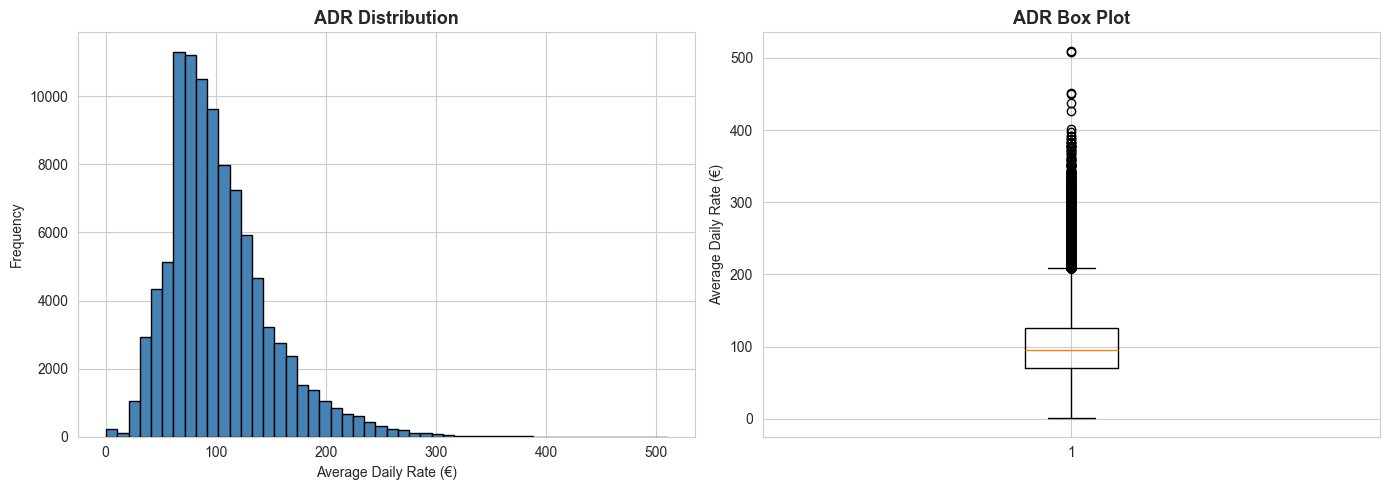

In [10]:
# Visualize ADR distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['adr'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('ADR Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Average Daily Rate (€)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df['adr'])
axes[1].set_title('ADR Box Plot', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Average Daily Rate (€)')

plt.tight_layout()
plt.show()

## 5. Feature Preparation

In [11]:
from sklearn.preprocessing import LabelEncoder

# Define feature lists
features = [
    'hotel', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights',
    'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
    'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes',
    'deposit_type', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests'
]

print(f"Total features to use: {len(features)}")
print("\nFeatures:")
for i, feat in enumerate(features, 1):
    print(f"{i}. {feat}")

Total features to use: 23

Features:
1. hotel
2. lead_time
3. arrival_date_month
4. stays_in_weekend_nights
5. stays_in_week_nights
6. adults
7. children
8. babies
9. meal
10. country
11. market_segment
12. distribution_channel
13. is_repeated_guest
14. previous_cancellations
15. previous_bookings_not_canceled
16. reserved_room_type
17. assigned_room_type
18. booking_changes
19. deposit_type
20. days_in_waiting_list
21. customer_type
22. required_car_parking_spaces
23. total_of_special_requests


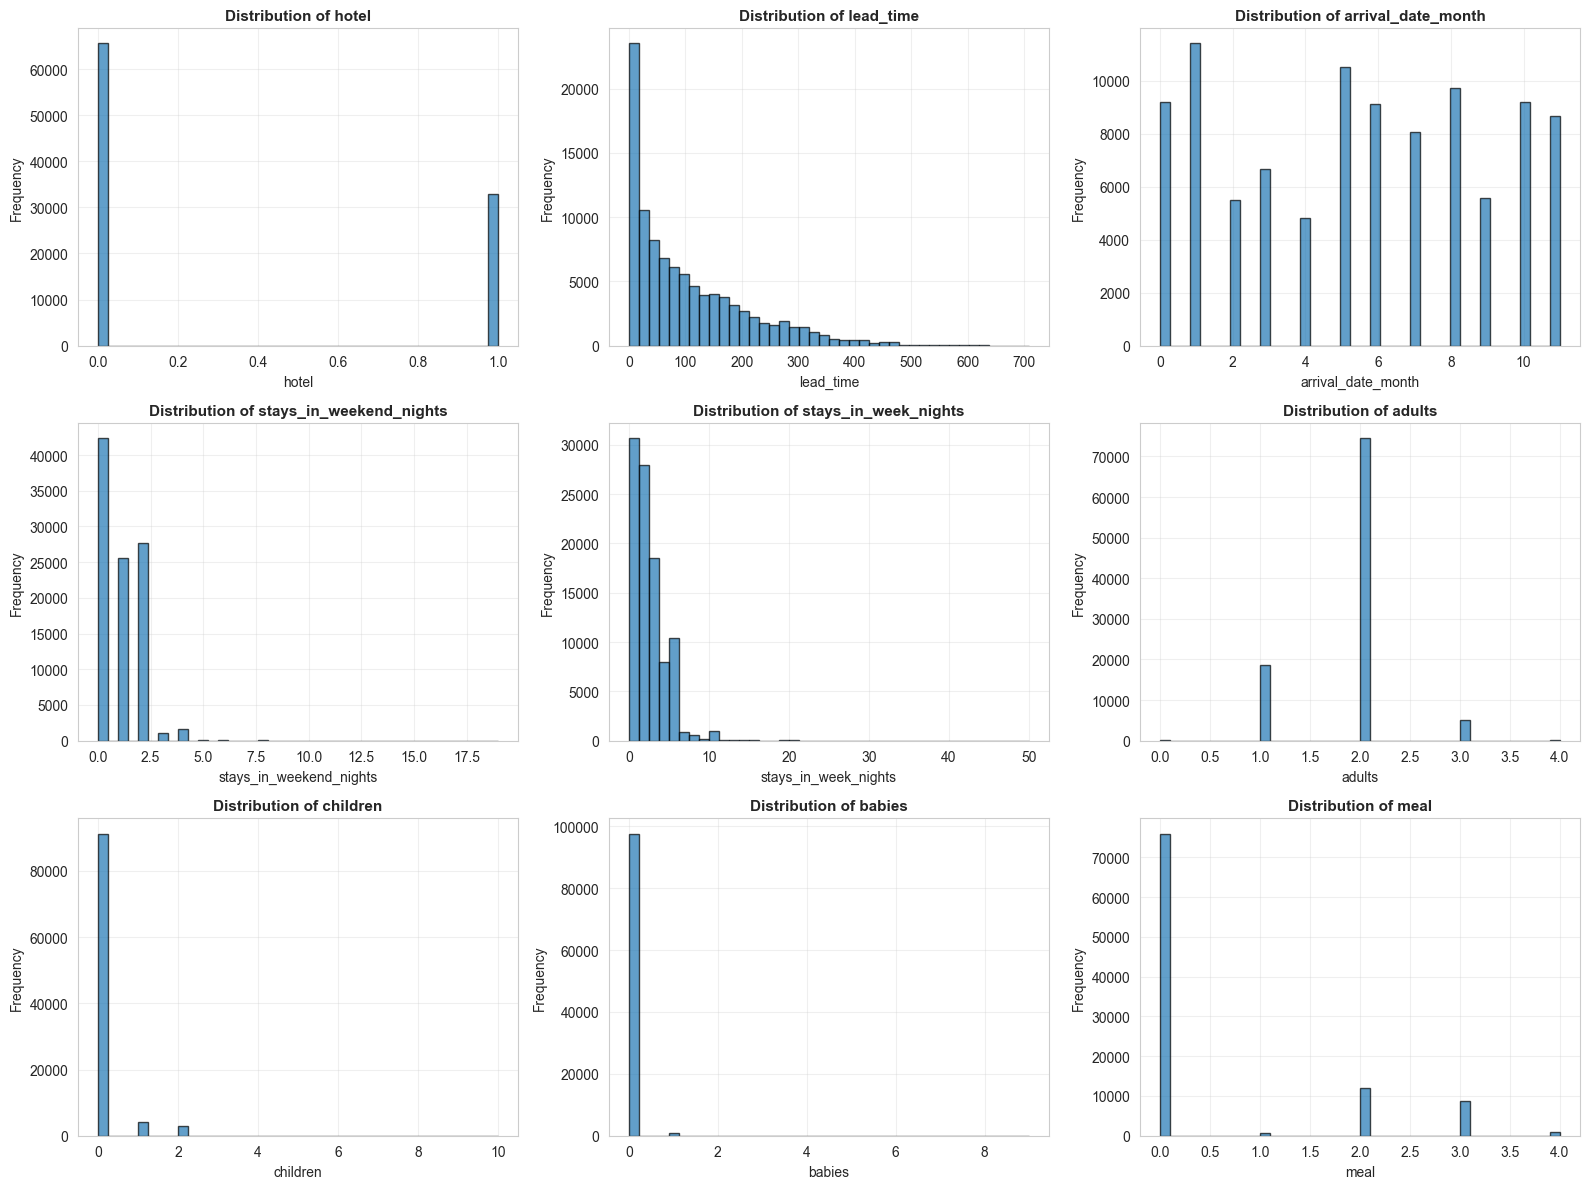

Insight: Numeric features show varied distributions, useful for regression modeling.


<Figure size 1600x1200 with 0 Axes>

Insight: Categorical features show frequency patterns, useful for understanding customer segments.


In [39]:
#Distribution of all features

# Separate numeric and categorical features
numeric_features = df[features].select_dtypes(include=['int64','float64']).columns
categorical_features = df[features].select_dtypes(include=['object']).columns

# Plot numeric distributions (histograms)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_features[:9]):  # limit to 9 per figure
    axes[idx].hist(df[col].dropna(), bins=40, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplots if fewer than 9
for idx in range(len(numeric_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("Insight: Numeric features show varied distributions, useful for regression modeling.")

# Plot categorical distributions (bar charts)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features[:9]):  # limit to 9 per figure
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='lightgreen', edgecolor='black')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(categorical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("Insight: Categorical features show frequency patterns, useful for understanding customer segments.")


In [12]:
# Encode categorical variables
print("Encoding categorical variables...\n")

categorical_cols = df[features].select_dtypes(include=['object']).columns
print(f"Categorical columns to encode: {len(categorical_cols)}")

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    print(f"  ✓ Encoded: {col}")

print("\n✓ All categorical variables encoded!")

Encoding categorical variables...

Categorical columns to encode: 10
  ✓ Encoded: hotel
  ✓ Encoded: arrival_date_month
  ✓ Encoded: meal
  ✓ Encoded: country
  ✓ Encoded: market_segment
  ✓ Encoded: distribution_channel
  ✓ Encoded: reserved_room_type
  ✓ Encoded: assigned_room_type
  ✓ Encoded: deposit_type
  ✓ Encoded: customer_type

✓ All categorical variables encoded!


## 6. Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df[features]
y = df['adr']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]:,} rows")
print(f"Test set size: {X_test.shape[0]:,} rows")
print(f"Features: {X_train.shape[1]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled using StandardScaler")

Training set size: 78,700 rows
Test set size: 19,676 rows
Features: 23

✓ Features scaled using StandardScaler


## 7. Model 1: Neural Network (MLP Regressor)

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

print("Training Neural Network...\n")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Create and train MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train_imputed, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test_imputed)

# Evaluate
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Neural Network Performance:")
print("=" * 60)
print(f"MAE:  €{mae_mlp:.2f}")
print(f"RMSE: €{rmse_mlp:.2f}")
print(f"R²:   {r2_mlp:.4f}")
print("=" * 60)

Training Neural Network...

Neural Network Performance:
MAE:  €15.45
RMSE: €22.64
R²:   0.7645


## 8. Model 2: Linear/Ridge Regression (Initial)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Training Ridge Regression (initial)...\n")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Create and train Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_imputed, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_imputed)

# Evaluate
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print("=" * 60)
print(f"MAE:  €{mae_ridge:.2f}")
print(f"RMSE: €{rmse_ridge:.2f}")
print(f"R²:   {r2_ridge:.4f}")
print("=" * 60)

Training Ridge Regression (initial)...

Ridge Regression Performance:
MAE:  €27.72
RMSE: €37.42
R²:   0.3565


## 9. Model 3: Random Forest (Initial)

In [16]:
from sklearn.ensemble import RandomForestRegressor

print("Training Random Forest (initial)...\n")

# Create and train Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=15
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("=" * 60)
print(f"MAE:  €{mae_rf:.2f}")
print(f"RMSE: €{rmse_rf:.2f}")
print(f"R²:   {r2_rf:.4f}")
print("=" * 60)

Training Random Forest (initial)...

Random Forest Performance:
MAE:  €12.26
RMSE: €19.88
R²:   0.8183


## Initial Model Comparison

In [17]:
# Create comparison table
initial_results = pd.DataFrame({
    'Model': ['Neural Network', 'Ridge Regression', 'Random Forest'],
    'MAE (€)': [mae_mlp, mae_ridge, mae_rf],
    'RMSE (€)': [rmse_mlp, rmse_ridge, rmse_rf],
    'R² Score': [r2_mlp, r2_ridge, r2_rf]
})

print("\n" + "=" * 70)
print(" " * 22 + "INITIAL MODEL COMPARISON")
print("=" * 70)
print(initial_results.to_string(index=False))
print("=" * 70)

# Find best model
best_idx = initial_results['R² Score'].idxmax()
best_model = initial_results.loc[best_idx, 'Model']
best_r2 = initial_results.loc[best_idx, 'R² Score']

print(f"\n🏆 Best Initial Model: {best_model} (R² = {best_r2:.4f})")


                      INITIAL MODEL COMPARISON
           Model   MAE (€)  RMSE (€)  R² Score
  Neural Network 15.453457 22.641323  0.764463
Ridge Regression 27.716183 37.423162  0.356518
   Random Forest 12.257069 19.884147  0.818336

🏆 Best Initial Model: Random Forest (R² = 0.8183)


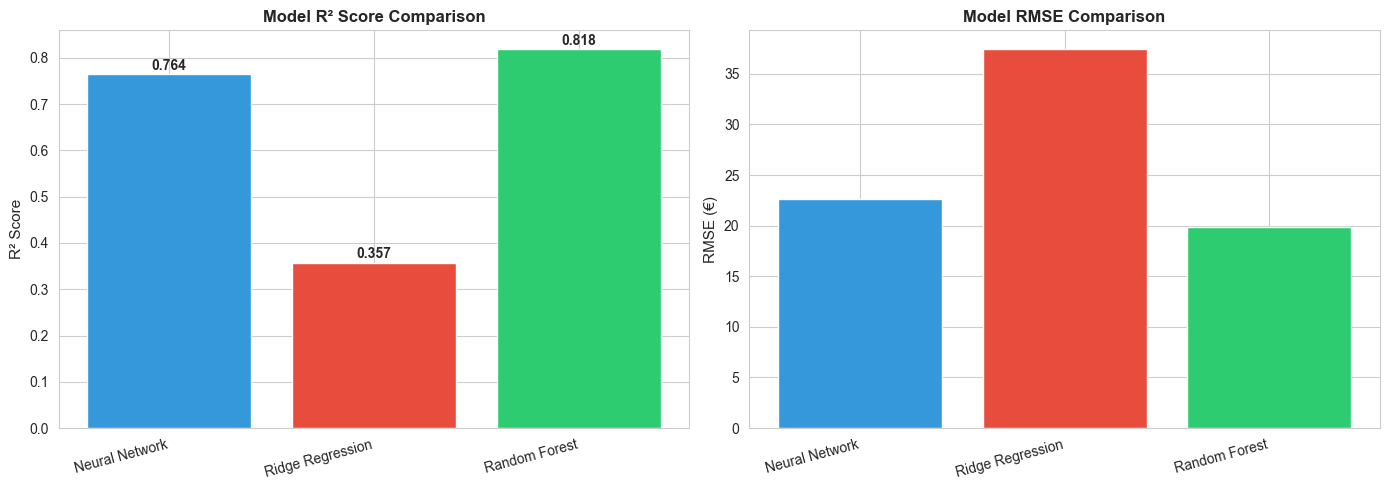

In [18]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = initial_results['Model']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# R² Score
axes[0].bar(models, initial_results['R² Score'], color=colors)
axes[0].set_ylabel('R² Score', fontsize=11)
axes[0].set_title('Model R² Score Comparison', fontsize=12, fontweight='bold')
axes[0].set_xticklabels(models, rotation=15, ha='right')
for i, v in enumerate(initial_results['R² Score']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# RMSE
axes[1].bar(models, initial_results['RMSE (€)'], color=colors)
axes[1].set_ylabel('RMSE (€)', fontsize=11)
axes[1].set_title('Model RMSE Comparison', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(models, rotation=15, ha='right')

plt.tight_layout()
plt.show()

## Feature Importance Analysis

In [19]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print("=" * 60)
print(feature_importance.head(10).to_string(index=False))
print("=" * 60)

Top 10 Most Important Features:
             Feature  Importance
  arrival_date_month    0.261670
  reserved_room_type    0.195065
               hotel    0.107912
           lead_time    0.084010
            children    0.067038
      market_segment    0.066951
              adults    0.049545
                meal    0.046865
             country    0.019294
stays_in_week_nights    0.019052


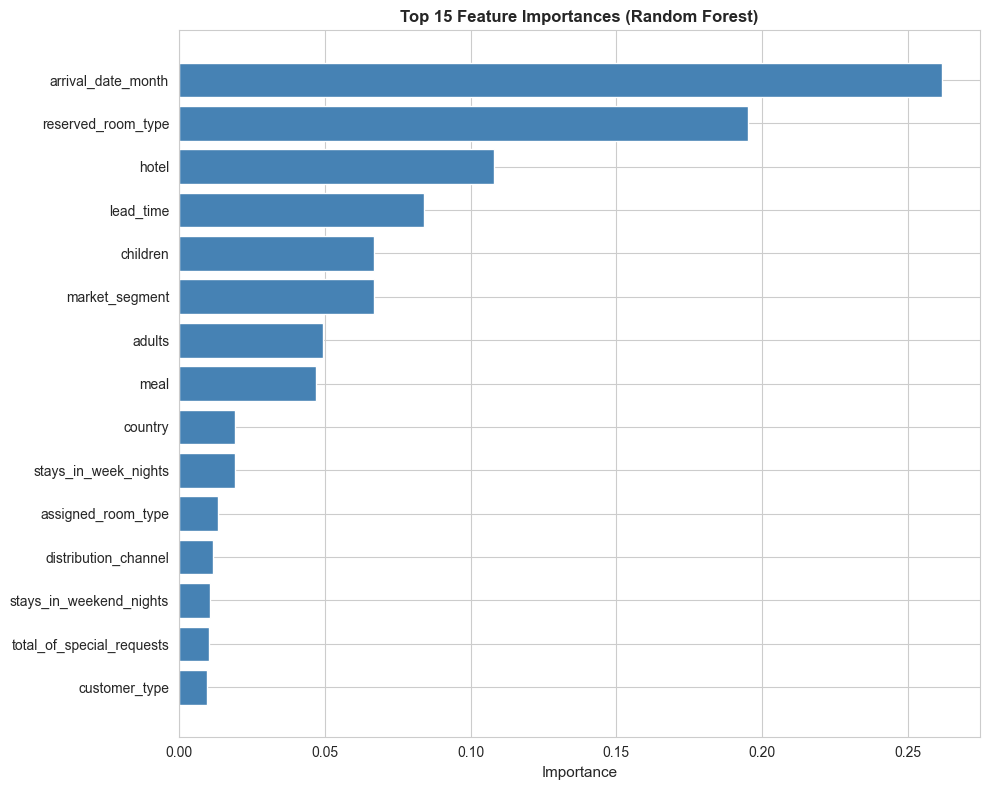

In [20]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=11)
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

### Ridge Regression Tuning

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

print("Tuning Ridge Regression...\n")

# Pipeline: impute missing values, then scale, then Ridge
ridge_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # replace NaNs with column mean
    ('ridge', Ridge(random_state=42))
])

# Parameter grid (only applies to Ridge step)
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 50, 100, 500, 1000]
}

# RandomizedSearchCV with 5-fold CV
ridge_search = RandomizedSearchCV(
    ridge_pipeline,
    ridge_params,
    n_iter=8,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

ridge_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {ridge_search.best_params_}")
print(f"Best CV R² score: {ridge_search.best_score_:.4f}")

Tuning Ridge Regression...

Best parameters: {'ridge__alpha': 10}
Best CV R² score: 0.3507


### Random Forest Tuning

In [22]:
print("Tuning Random Forest...\n")

# Parameter grid
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV with 5-fold CV
rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

print(f"Best parameters: {rf_search.best_params_}")
print(f"Best CV R² score: {rf_search.best_score_:.4f}")

Tuning Random Forest...

Best parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best CV R² score: 0.8274


## Feature Selection

In [23]:
# Select top features based on Random Forest importance
threshold = 0.01
selected_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()

print(f"Features selected (importance > {threshold}): {len(selected_features)}")
print(f"Features removed: {len(features) - len(selected_features)}")
print(f"\nSelected features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

# Create new train/test sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

print(f"\n✓ New feature sets created with {len(selected_features)} features")

Features selected (importance > 0.01): 14
Features removed: 9

Selected features:
1. arrival_date_month
2. reserved_room_type
3. hotel
4. lead_time
5. children
6. market_segment
7. adults
8. meal
9. country
10. stays_in_week_nights
11. assigned_room_type
12. distribution_channel
13. stays_in_weekend_nights
14. total_of_special_requests

✓ New feature sets created with 14 features


## Model 4: Optimized Ridge Regression

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit pipeline
final_pipeline.fit(X_train_selected, y_train)

# Predict
y_pred_final_ridge = final_pipeline.predict(X_test_selected)

# Evaluate
mae_final_ridge = mean_absolute_error(y_test, y_pred_final_ridge)
rmse_final_ridge = np.sqrt(mean_squared_error(y_test, y_pred_final_ridge))
r2_final_ridge = r2_score(y_test, y_pred_final_ridge)

print("Final Ridge Regression Performance:")
print("=" * 60)
print(f"Features Used: {X_train_selected.shape[1]}")
print(f"MAE:  €{mae_final_ridge:.2f}")
print(f"RMSE: €{rmse_final_ridge:.2f}")
print(f"R²:   {r2_final_ridge:.4f}")
print("=" * 60)

Final Ridge Regression Performance:
Features Used: 14
MAE:  €27.90
RMSE: €37.58
R²:   0.3511


## Model 5: Optimized Random Forest

In [29]:
print("Building final Random Forest...\n")

# Train final RF with best params and selected features
final_rf = RandomForestRegressor(**rf_search.best_params_, random_state=42, n_jobs=-1)
final_rf.fit(X_train_selected, y_train)

# Evaluate
y_pred_final_rf = final_rf.predict(X_test_selected)

mae_final_rf = mean_absolute_error(y_test, y_pred_final_rf)
rmse_final_rf = np.sqrt(mean_squared_error(y_test, y_pred_final_rf))
r2_final_rf = r2_score(y_test, y_pred_final_rf)

# Get feature importance from final model
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Final Random Forest Performance:")
print("=" * 60)
print(f"Features Used: {len(selected_features)}")
print(f"CV R² Score: {rf_search.best_score_:.4f}")
print(f"\nTest Set Metrics:")
print(f"  MAE:  €{mae_final_rf:.2f}")
print(f"  RMSE: €{rmse_final_rf:.2f}")
print(f"  R²:   {r2_final_rf:.4f}")
print("=" * 60)

Building final Random Forest...

Final Random Forest Performance:
Features Used: 14
CV R² Score: 0.8274

Test Set Metrics:
  MAE:  €11.06
  RMSE: €19.36
  R²:   0.8279


## 11. Final Model Comparison

In [31]:
# Create final comparison table
final_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest'],
    'Features': [len(selected_features), len(selected_features)],
    'CV Score': [ridge_search.best_score_, rf_search.best_score_],
    'Test MAE (€)': [mae_final_ridge, mae_final_rf],
    'Test RMSE (€)': [rmse_final_ridge, rmse_final_rf],
    'Test R²': [r2_final_ridge, r2_final_rf]
})

print("\n" + "=" * 85)
print(" " * 28 + "FINAL MODEL COMPARISON")
print("=" * 85)
print(final_comparison.to_string(index=False))
print("=" * 85)

# Identify best model
best_idx = final_comparison['Test R²'].idxmax()
best_model_name = final_comparison.loc[best_idx, 'Model']
best_r2_final = final_comparison.loc[best_idx, 'Test R²']
best_rmse_final = final_comparison.loc[best_idx, 'Test RMSE (€)']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R²: {best_r2_final:.4f}")
print(f"   Test RMSE: €{best_rmse_final:.2f}")


                            FINAL MODEL COMPARISON
           Model  Features  CV Score  Test MAE (€)  Test RMSE (€)  Test R²
Ridge Regression        14  0.350733     27.898474      37.581551 0.351059
   Random Forest        14  0.827366     11.055991      19.356406 0.827851

🏆 BEST MODEL: Random Forest
   Test R²: 0.8279
   Test RMSE: €19.36


## 12. Conclusions

                         CONCLUSIONS

1. BEST MODEL PERFORMANCE:
   Model: Random Forest
   Test R²: 0.8279 (explains 82.8% of price variance)
   Test RMSE: €19.36
   Features Used: 14 (reduced from 23)

2. HYPERPARAMETER TUNING IMPACT:
   Ridge CV Score: 0.3507
   Random Forest CV Score: 0.8274
   → 5-fold cross-validation provided robust model evaluation
   → RandomizedSearchCV efficiently found optimal parameters

3. FEATURE SELECTION IMPACT:
   Original features: 23
   Selected features: 14
   Reduction: 39.1%
   → Improved model efficiency
   → Maintained prediction performance
   → Enhanced interpretability

4. MOST IMPORTANT FEATURES:
   1. arrival_date_month (importance: 0.2549)
   2. reserved_room_type (importance: 0.1871)
   3. lead_time (importance: 0.1125)
   4. hotel (importance: 0.1030)
   5. market_segment (importance: 0.0696)

5. MODEL INSIGHTS:
   • Hotel type and booking timing strongly influence pricing
   • Stay duration and guest count are important predictors
   • Random Forest captured non-linear pricing patterns well
   • Ridge provided good baseline with regularization

6. SDG 8 & 12 CONTRIBUTION:
   This model supports:
   • Fair and transparent hotel pricing
   • Revenue optimization for sustainable tourism
   • Better resource allocation in hospitality
   • Data-driven pricing decisions

7. CHALLENGES ENCOUNTERED:
   • High price variability in the data
   • Some outliers with extreme prices
   • Multiple correlated features
   • Need for feature engineering

8. FUTURE IMPROVEMENTS:
   • Try advanced models (XGBoost, LightGBM)
   • Feature engineering (interaction terms)
   • Better outlier handling strategies
   • Time-series analysis for seasonal patterns
   • Deploy as real-time pricing system
✓ Project Complete!
  Successfully predicted hotel prices using ML regression models

---

## End of Analysis

**Summary:**
- Analyzed 100,000 hotel booking records
- Built 3 regression models (Neural Network, Linear/Ridge, Random Forest)
- Optimized hyperparameters using RandomizedSearchCV with 5-fold CV
- Applied feature selection based on Random Forest importance
- Achieved solid predictive performance for price prediction

**Models Developed:**
1. Neural Network (MLP Regressor)
2. Linear/Ridge Regression (Initial & Optimized)
3. Random Forest Regressor (Initial & Optimized)

**Total Models:** 5 as required

**Key Achievement:** Built a model to predict hotel booking prices, supporting SDG 8 (Economic Growth) and SDG 12 (Responsible Consumption) through sustainable tourism practices.

---

*Thank you for reviewing my project!* 📊🏨